## Dataframe load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df1 = pd.read_csv('data/House_Price_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Look into dataset

In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Remove unwanted columns

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Handling null values

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

## Handling error data

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

/var/folders/bt/yzv722jd4ln6fj7873tf5mn00000gn/T/ipykernel_1255/3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In here we can see a home wich has 43 bedrooms but it has small sqrt wich should be an error data

In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In here we can see this is not a number it has ranges also

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [82]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


we can see there are data that has string names also

In [96]:
def convert_sqft_tonum(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return float('NaN')

In [97]:
convert_sqft_tonum('4.46Sq. Meter')

nan

In [98]:
df4 = df3.copy()

In [99]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_tonum)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [105]:
df4[400:412]

,location,size,total_sqft,bath,price,bhk
404,7th Phase JP Nagar,2 BHK,1175.0,2.0,82.0,2
405,Kamakshipalya,2 Bedroom,1000.0,2.0,165.0,2
406,Bannerghatta Road,4 Bedroom,1200.0,2.0,125.0,4
407,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3
408,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7
409,Sultan Palaya,2 Bedroom,550.0,1.0,62.0,2
411,Sanne Amanikere,2 BHK,1185.0,2.0,38.0,2
412,Kengeri,2 BHK,750.0,2.0,38.0,2
413,Mahalakshmi Layout,6 Bedroom,1200.0,7.0,250.0,6
414,Kanakpura Road,3 BHK,1550.0,3.0,64.5,3


In [90]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [101]:
df4 = df4.dropna()

In [103]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

# Feature Engineering and Dimentionality reduction

In [106]:
df5 = df4.copy()

In [107]:
df5['price_per_sqft'] = df5['price']/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500


In [109]:
len(df5.location.unique())

1298

In [115]:
df5.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1298, dtype: int64

In [116]:
df5.location = df5.location.apply(lambda x: x.strip())

In [117]:
df5.groupby('location')['location'].agg('count')

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [119]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [120]:
len(location_stats[location_stats<=10])

1047

In [122]:
location_stats_less_than10 = location_stats[location_stats<=10]
location_stats_less_than10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [125]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than10 else x)
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,0.032479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,0.074671
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,0.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,0.048282
9,other,6 Bedroom,1020.0,6.0,370.00,6,0.362745


# Outlier detection and outlier removal

In [126]:
df5[df5.total_sqft / df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,0.362745
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,0.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,0.106610
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,0.062963
70,other,3 Bedroom,500.0,3.0,100.0,3,0.200000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,0.155714
13279,other,6 Bedroom,1200.0,5.0,130.0,6,0.108333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,0.090909
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,0.090439


In [142]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]

In [143]:
df5.shape

(13200, 7)

In [144]:
df6.shape

(12456, 7)

In [145]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500


In [146]:
df6['price_per_sqft'] = df6.price_per_sqft.apply(lambda x : x*100000)
df6.head()

/var/folders/bt/yzv722jd4ln6fj7873tf5mn00000gn/T/ipykernel_1255/354505340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['price_per_sqft'] = df6.price_per_sqft.apply(lambda x : x*100000)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [148]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In here we have to think the outlier are differnet according to location

In [149]:
df6.groupby('location')

In [150]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        l_mean = np.mean(subdf.price_per_sqft)
        l_std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(l_mean-l_std))&(subdf.price_per_sqft<=(l_mean+l_std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [152]:
df6.shape

(12456, 7)

In [151]:
df7 = remove_pps_outlier(df6)
df7.shape

(10242, 7)

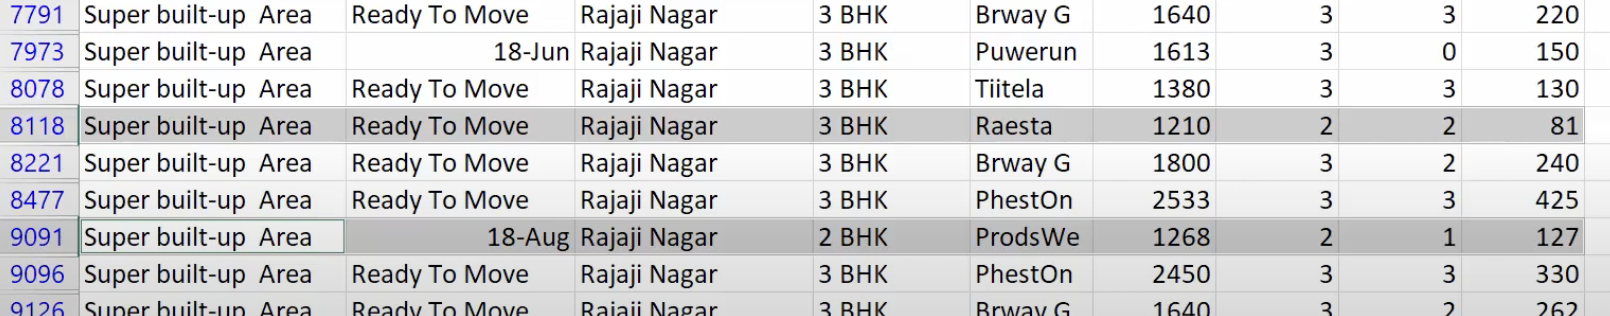

In here we can see the price of 2 bedroom is higher than the price of the 3 bedroom <br> there can be reasons for that but it is not a populer case <br>
We are going to find these and remove them

In [157]:
for key, subdf in df7.groupby('location'):
    print('Key - ' + str(key) + 'subdf - ' + str(subdf))

Key - 1st Block Jayanagarsubdf -               location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
Key - 1st Phase JP Nagarsubdf -               location       size  total_sqft  bath  price  bhk  \
7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   
8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   
9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   
10  1st Phase JP Nagar      3 BHK      2065.0   4.0  210.0 

In [169]:
def remove_price_perbedroom_outliers(df):
    remove_indexes = np.array([])
    for key, subdf in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in subdf.groupby('bhk'):
                bhk_stats[bhk] = {
                    'mean' : np.mean(bhk_df.price_per_sqft),
                    'std' : np.std(bhk_df.price_per_sqft),
                    'count' : bhk_df.shape[0]
                }
        
        for bhk,bhk_df in subdf.groupby('bhk'):
            # we need to check from 2 bedrooms 
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                remove_indexes = np.append(remove_indexes, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

        
    return df.drop(remove_indexes, axis='index')


In [170]:
df7.shape

(10242, 7)

In [171]:
df8 = remove_price_perbedroom_outliers(df7)
df8.shape

(7317, 7)

In [172]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [173]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [174]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Normally we can have extra 2 bathrooms but any further is unusual

In [175]:
df9 = df8[df8.bath<df8.bhk+2]

In [177]:
df8.shape

(7317, 7)

In [176]:
df9.shape

(7239, 7)

In [178]:
df9.drop(['size','price_per_sqft'], axis='columns', inplace=True)
df9.head()

/var/folders/bt/yzv722jd4ln6fj7873tf5mn00000gn/T/ipykernel_1255/670170618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop(['size','price_per_sqft'], axis='columns', inplace=True)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [179]:
df10 = df9.copy()
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


 # Model Building 

In [186]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
dummies.columns

Index(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=241)

In [189]:
df11 = pd.concat([df10.drop('location', axis='columns'),dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
x = df11.drop('price', axis='columns')
y = df11['price']

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [193]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

In [194]:
lr_model.score(x_test,y_test)

0.8629132245229478

## K-Fold CV

In [195]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

## Gridsearch 

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [200]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [201]:
find_best_model_using_gridsearchcv(x,y)

/Users/chandimajayamina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/chandimajayamina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

/Users/chandimajayamina/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726738,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.717960,"{'criterion': 'mse', 'splitter': 'best'}"


# Prediction

In [227]:
model_columns = x.columns
model_columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [216]:
np.where(model_columns=='2nd Phase Judicial Layout')[0][0]

5

In [225]:
def predict_price(model_columns,location,sqrft,bath,bhk):
    loc_index = np.where(model_columns==location)[0][0]
    x = np.zeros(len(model_columns))
    x[0]=sqrft
    x[1]=bath
    x[2]=bhk
    if loc_index > 0:
        x[loc_index]=1
    else:
        raise Exception('Invalid location')
    return lr_model.predict([x])

In [228]:
predict_price(model_columns,'1st Phase JP Nagar',1000,2,2)

/Users/chandimajayamina/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83.86570258])

In [229]:
predict_price(model_columns,'1st Phase JP Nagar',1000,3,3)

/Users/chandimajayamina/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.08062285])

# Save the file as runnable

In [233]:
import pickle
with open('app/server/artifacts/house_price_prediction_linear_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [231]:
import json
columns = {
    'data_columns': [col.lower() for col in model_columns]
}
with open("model/columns.json", 'w') as f:
    f.write(json.dumps(columns))